In [131]:
import numpy as np
import matplotlib.pyplot as plt
T = 1
delta = 5
N = 10
M = 10000

In [132]:
def generate_Q(N,  M, tau):
    ii = 0
    tore = tau*np.sqrt(2/np.pi)
    Q = []
    while ii < M:
        tempQ = 2*tore*np.random.rand(N) - tore
        tempQ = np.array(tempQ)
        if np.linalg.norm(tempQ) <= tore:
            Q = np.append(Q, tempQ)
            ii += 1
    return (Q.reshape(-1, N))

def sol_act(Q, T):
    N = len(Q[0])
    A = np.diag(np.exp(-(np.arange(1, N+1))**2*T))
    F = A@Q.T #A = NxN, Q = MxN, Q.T = NxM , F = NxM
    return F

def noise_data(F, delta):
    e = 2*np.random.rand(len(F[:,0]), len(F[0])) - 1
    N = len(F[:])
    for m in range(len(F[0])):
        norm = np.linalg.norm(F[:,m])
        e[:, m] = e[:, 0]*norm*delta
    nF = F+e
    return nF

def sol_Tik(alpha, T, F):
    N = len(F[:])
    invA = np.diag(1/(alpha*np.exp((np.arange(1, N+1))**2*T)+np.exp(-(np.arange(1, N+1))**2*T))) # A = NxN
    hatQ = invA@F 
    return hatQ

def result_gen_data(N, M, tau, Q, delta):
    #Q = generate_Q(N, M, tau)
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    np.savetxt('Q1.txt', Q.T, fmt='%8f', delimiter = ',', header='')
    np.savetxt('F1.txt', F, fmt='%8f', delimiter = ',', header='')
    np.savetxt('nF1.txt', nF, fmt='%8f', delimiter = ',', header='')

In [133]:
Q = generate_Q(N, M, tau = 1)
F = sol_act(Q, T)
nF = noise_data(F, delta)
result_gen_data(N, M, tau = 1, Q = Q, delta = 0.01)
Q

array([[-0.14214105,  0.19029447, -0.32995014, ..., -0.24718805,
         0.23495808, -0.33341153],
       [-0.1093144 , -0.08745137, -0.10878991, ...,  0.40444791,
         0.056255  ,  0.28577918],
       [-0.13770495, -0.1564227 ,  0.38883787, ..., -0.2937906 ,
         0.24111486, -0.10381808],
       ...,
       [-0.18094292,  0.07724999,  0.01827093, ..., -0.04208125,
        -0.3321787 ,  0.4099182 ],
       [ 0.1364351 ,  0.19686836,  0.24291953, ..., -0.10406047,
         0.14012355, -0.13344818],
       [ 0.03110481,  0.36876122,  0.02809461, ...,  0.20799935,
        -0.06571024,  0.0610461 ]])

In [134]:
def result_Lcurve(N, tau, delta, min_al):
    #get data
    M = 1 #one data set
    Q = generate_Q(N, M, tau)
    
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    
    al = np.linspace(0, min_al, 100)
    q1 = []
    q2 = []
    for ii in range(len(al)):
        q1.append(sol_Tik(10**al[ii], T, F))
        q2.append(sol_Tik(10**al[ii], T, nF))
    q1 = np.array(q1) 
    q2 = np.array(q2)
    
    n = np.arange(1, N+1)
    A = np.diag(np.exp(-n**2*T))
    
    x1 = []
    x2 = []
    y1 = []
    y2 = []

    for i in range(len(al)):
        x1.append(np.linalg.norm(A@q1[i]-F))
        y1.append(np.linalg.norm(q1[i]))
        x2.append(np.linalg.norm(A@q2[i]-nF))
        y2.append(np.linalg.norm(q2[i]))
    
    fig = plt.figure(figsize = (10,10))
    fig.add_subplot(2, 1, 1)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(x1, y1)
    plt.title("without noise")

    
    fig.add_subplot(2, 1, 2)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(x2, y2)
    plt.title("with noise")     

    
    plt.show()
    return np.array(x1), np.array(y1), np.array(x2), np.array(y2)

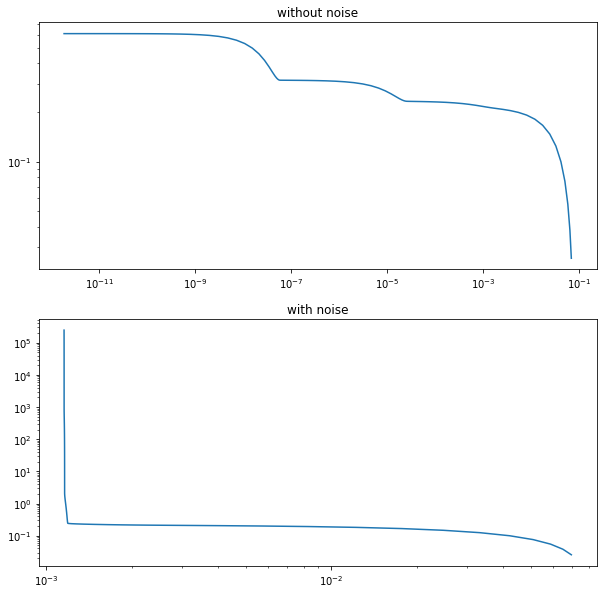

In [135]:
x1, y1, x2, y2 = result_Lcurve(10, 1, 0.01, -20)
x2 = np.flip(x2)
y2 = np.flip(y2)

In [136]:
print(f' x2 : \n {x2}\n \n y2 : \n {y2}')

 x2 : 
 [0.00115305 0.00115324 0.00115337 0.00115345 0.0011535  0.00115353
 0.00115355 0.00115356 0.00115357 0.00115357 0.00115358 0.00115358
 0.00115358 0.00115358 0.00115358 0.00115358 0.00115358 0.00115358
 0.00115358 0.00115358 0.00115358 0.00115358 0.00115358 0.00115359
 0.0011536  0.00115361 0.00115365 0.00115374 0.00115391 0.0011542
 0.00115465 0.00115523 0.00115587 0.00115649 0.00115702 0.00115742
 0.00115771 0.00115792 0.00115805 0.00115814 0.00115819 0.00115823
 0.00115825 0.00115827 0.00115828 0.00115828 0.00115829 0.00115829
 0.00115829 0.00115829 0.00115829 0.0011583  0.0011583  0.00115832
 0.00115837 0.00115848 0.00115873 0.00115926 0.0011603  0.00116213
 0.00116495 0.00116865 0.00117282 0.00117686 0.00118032 0.00118301
 0.00118496 0.0011863  0.0011872  0.0011878  0.00118819 0.00118848
 0.00118876 0.00118917 0.00119    0.00119192 0.00119642 0.00120675
 0.00122921 0.00127421 0.00135464 0.00147915 0.00164418 0.00183512
 0.00204071 0.00227399 0.00259442 0.00312923 0.00408064

In [137]:
O = np.column_stack((x2, y2))
v = []
for i in range(len(O) - 1):
    v.append(O[i+1]-O[i])
v

[array([ 1.94983862e-07, -9.07419972e+04]),
 array([ 1.24573223e-07, -5.76482589e+04]),
 array([ 7.90868218e-08, -3.64675569e+04]),
 array([ 5.00085937e-08, -2.30054184e+04]),
 array([ 3.15418758e-08, -1.44858706e+04]),
 array([ 1.98627252e-08, -9.10781423e+03]),
 array([ 1.24955386e-08, -5.71658478e+03]),
 array([ 7.85592914e-09, -3.57712364e+03]),
 array([ 4.93706125e-09, -2.22326061e+03]),
 array([ 3.10193678e-09, -1.36023795e+03]),
 array([ 1.94865844e-09, -8.03954458e+02]),
 array([ 1.22411176e-09, -4.45134057e+02]),
 array([ 7.69097436e-10, -2.24073178e+02]),
 array([ 4.83654084e-10, -1.02236637e+02]),
 array([ 3.05298667e-10, -4.35411089e+01]),
 array([ 1.95633671e-10, -1.80742285e+01]),
 array([ 1.32712051e-10, -7.77746222e+00]),
 array([ 1.08224016e-10, -3.96495710e+00]),
 array([ 1.30684580e-10, -2.96513694e+00]),
 array([ 2.39667809e-10, -3.38357685e+00]),
 array([ 5.44448361e-10, -4.82632780e+00]),
 array([ 1.31849439e-09, -7.38186596e+00]),
 array([ 3.21769502e-09, -1.1433

## 기존의 방법

In [138]:
cos = []
#array([-0.00443861,  0.01208635]) = v[0]
for i in range(len(v)-1):
    v1_norm = np.linalg.norm(v[i])
    v2_norm = np.linalg.norm(v[i+1])
    v_cos = np.dot(v[i], v[i+1])/(v1_norm*v2_norm)
    cos.append(v_cos)
a = np.argmin(cos)
a

min_al = -20
al = np.linspace(0, min_al, 100)
alpha = 10**al[a]
alpha

6.734150657750801e-18

## 개선

In [139]:
def find_best_idx(x2, y2):
    O = np.column_stack((x2, y2))
    v = []
    k = 10
    for i in range(len(O) - 1 - k):
        v.append(O[i+k]-O[i])
    v

    cos = []

    for i in range(len(v)-1-k):
        v1_norm = np.linalg.norm(v[i])
        v2_norm = np.linalg.norm(v[i+k])
        v_cos = np.dot(v[i], v[i+k])/(v1_norm*v2_norm)
        cos.append(v_cos)
    a = np.argmin(cos) + k
    return a   

a = find_best_idx(x2, y2)
al = np.linspace(0, -20, 100)
alpha = 10**al[a]
alpha

6.734150657750801e-18

In [140]:
hatQ = sol_Tik(alpha, T, F)
nF = noise_data(F, delta = delta)
hatQ
np.savetxt('hatQ.txt', hatQ, fmt='%8f', delimiter = ',', header='')

In [141]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

arr = []
for i in range(M):
    arr.append(i+1)
    

In [142]:
#load data
#column name에 data가 들어가있기 때문에 "names = arr" 로 처리해 줍니다. arr은 1 ~ len(F)의 숫자가 담겨있습니다.
dataF = pd.read_csv('C:/Users/Administrator/Tikhonov/v1/F1.txt', sep = ',', names = arr)
#dataQ : Q로 학습
#dataQ = pd.read_csv('C:/Users/Administrator/Tikhonov/v1/Q.txt', sep = ',', names = arr)
dataQ = pd.read_csv('C:/Users/Administrator/Tikhonov/v1/hatQ.txt', sep = ',', names = arr)
data_nF = pd.read_csv('C:/Users/Administrator/Tikhonov/v1/nF1.txt', sep = ',', names = arr)

In [143]:
def make_arr(A):
    arA = []
    for j in range(len(A.iloc[0, :])):
        arA1 = []
        for i in range(len(A.iloc[:,0])):
            tmpA = A.iloc[:,j][i]
            arA1.append(tmpA)
        arA.append(arA1)
    return arA

In [144]:
#make array
arrF = make_arr(dataF)
dataF = np.array(arrF)

arrQ = make_arr(dataQ)
dataQ = np.array(arrQ)

arr_nF = make_arr(data_nF)
data_nF = np.array(arr_nF)

In [145]:
# data 분할

import math
train_size = math.floor(len(dataF)*0.6) # train : 60%
val_size = math.floor(len(dataF)*0.2) #val : 20%
test_size = math.floor(len(dataF)*0.2) #test : 20%
#generate F_data, F_val, F_test
F_data = dataF[:train_size, :]
F_val = dataF[train_size:(val_size + train_size), :]
F_test = dataF[(val_size + train_size):(val_size + train_size + test_size), :]

#generate Q_data, Q_val, Q_test
Q_data = dataQ[:train_size, :]
Q_val = dataQ[train_size:(val_size + train_size), :]
Q_test = dataQ[(val_size + train_size):(val_size + train_size + test_size), :]

#generate nF_data, nF_val, nF_test
nF_data = data_nF[:train_size, :]
nF_val = data_nF[train_size:(val_size + train_size), :]
nF_test = data_nF[(val_size + train_size):(val_size + train_size + test_size), :]

print(f'{F_data.shape}, {F_test.shape}, {F_val.shape}')
print(f'{Q_data.shape}, {Q_test.shape}, {Q_val.shape}')
print(f'{nF_data.shape}, {nF_test.shape}, {nF_val.shape}')

(6000, 10), (2000, 10), (2000, 10)
(6000, 10), (2000, 10), (2000, 10)
(6000, 10), (2000, 10), (2000, 10)


In [146]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential() #Sequentioal

model.add(keras.layers.Dense(input_dim = 10, units = 10, activation= "tanh",kernel_initializer ="HeNormal" )) 
model.add(keras.layers.Dense(20, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))  
model.add(keras.layers.Dense(100, activation= "tanh")) 
model.add(keras.layers.Dense(120, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))
model.add(keras.layers.Dense(10, activation= "tanh"))

In [147]:
with tf.device('/GPU:0'):
    F_train = tf.constant(F_data)
    Q_train = tf.constant(Q_data)
    nF_train = tf.constant(nF_data)
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [148]:
model.compile(loss = "mse",
              optimizer = "ADAM",
              metrics = ["accuracy"])
history = model.fit(x = F_train, y = Q_train, validation_data=(F_val, Q_val),epochs = 1000)

Epoch 1/1000
188/188 [==============================] - 0s 798us/step - loss: 0.0125 - accuracy: 0.4482 - val_loss: 0.0108 - val_accuracy: 0.5695
Epoch 2/1000
188/188 [==============================] - 0s 543us/step - loss: 0.0107 - accuracy: 0.5275 - val_loss: 0.0108 - val_accuracy: 0.5370
Epoch 3/1000
188/188 [==============================] - 0s 527us/step - loss: 0.0107 - accuracy: 0.5417 - val_loss: 0.0108 - val_accuracy: 0.5715
Epoch 4/1000
188/188 [==============================] - 0s 527us/step - loss: 0.0106 - accuracy: 0.5443 - val_loss: 0.0108 - val_accuracy: 0.4695
Epoch 5/1000
188/188 [==============================] - 0s 537us/step - loss: 0.0106 - accuracy: 0.5513 - val_loss: 0.0108 - val_accuracy: 0.5245
Epoch 6/1000
188/188 [==============================] - 0s 532us/step - loss: 0.0106 - accuracy: 0.5228 - val_loss: 0.0108 - val_accuracy: 0.5670
Epoch 7/1000
188/188 [==============================] - 0s 548us/step - loss: 0.0106 - accuracy: 0.5428 - val_loss: 0.0107 -

In [149]:
#F 학습 후 F accuracy
result = model.evaluate(F_test, Q_test)

63/63 [==============================] - 0s 286us/step - loss: 0.0053 - accuracy: 0.7255


In [150]:
#F 학습 후 nF accuracy
result = model.evaluate(nF_test, Q_test)

63/63 [==============================] - 0s 302us/step - loss: 0.0053 - accuracy: 0.7260


In [151]:
model = keras.models.Sequential() #Sequentioal

model.add(keras.layers.Dense(input_dim = 10, units = 10, activation= "tanh",kernel_initializer ="HeNormal" )) 
model.add(keras.layers.Dense(20, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))  
model.add(keras.layers.Dense(100, activation= "tanh")) 
model.add(keras.layers.Dense(120, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))
model.add(keras.layers.Dense(10, activation= "tanh"))

model.compile(loss = "mse",
              optimizer = "adam",
              metrics = ["accuracy"])
history = model.fit(x = nF_train, y = Q_train, validation_data=(nF_val, Q_val),epochs = 1000)

Epoch 1/1000
188/188 [==============================] - 0s 803us/step - loss: 0.0121 - accuracy: 0.4828 - val_loss: 0.0109 - val_accuracy: 0.5665
Epoch 2/1000
188/188 [==============================] - 0s 543us/step - loss: 0.0107 - accuracy: 0.5388 - val_loss: 0.0109 - val_accuracy: 0.5710
Epoch 3/1000
188/188 [==============================] - 0s 532us/step - loss: 0.0107 - accuracy: 0.5403 - val_loss: 0.0108 - val_accuracy: 0.5500
Epoch 4/1000
188/188 [==============================] - 0s 527us/step - loss: 0.0107 - accuracy: 0.5363 - val_loss: 0.0108 - val_accuracy: 0.5250
Epoch 5/1000
188/188 [==============================] - 0s 527us/step - loss: 0.0106 - accuracy: 0.5455 - val_loss: 0.0108 - val_accuracy: 0.5660
Epoch 6/1000
188/188 [==============================] - 0s 532us/step - loss: 0.0106 - accuracy: 0.5442 - val_loss: 0.0108 - val_accuracy: 0.5355
Epoch 7/1000
188/188 [==============================] - 0s 527us/step - loss: 0.0106 - accuracy: 0.5440 - val_loss: 0.0108 -

In [152]:
#nF 학습 후 nF accuracy
result = model.evaluate(nF_test, Q_test)

63/63 [==============================] - 0s 286us/step - loss: 0.0053 - accuracy: 0.7605
